# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [199]:
import numpy as np

np.random.seed(42) # For reproducibility

def initialize_network(input_size, hidden_layers, output_size):
    
    num_nodes_previous = input_size # number of nodes in the previous layer
    num_hidden_layers = len(hidden_layers) # number of nodes in the hidden layer

    network = {} # initialize as an empty dictionary

    
    # loop through each layer and randomly initialize the weights and biases asscoiated with each layer
    for layer in range(num_hidden_layers + 1):
        
        # determine name of the layer
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = output_size
        else:
            layer_name = 'layer_{}'.format(layer+1) # otherwise give the layer a number
            num_nodes = hidden_layers[layer]

        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2)
            }

        num_nodes_previous = num_nodes

    return network

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("Yarixa + Initialized Network:", network)

Yarixa + Initialized Network: {'layer_1': {'node_1': {'weights': array([0.37, 0.95, 0.73]), 'bias': array([0.6])}, 'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])}, 'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])}, 'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}}, 'layer_2': {'node_1': {'weights': array([0.3 , 0.52, 0.43, 0.29]), 'bias': array([0.61])}, 'node_2': {'weights': array([0.14, 0.29, 0.37, 0.46]), 'bias': array([0.79])}, 'node_3': {'weights': array([0.2 , 0.51, 0.59, 0.05]), 'bias': array([0.61])}}, 'output': {'node_1': {'weights': array([0.17, 0.07, 0.95]), 'bias': array([0.97])}}}


## Step 2: Compute Weighted Sum

In [202]:
def compute_weighted_sum(inputs, weights, biases):
    # Please numpy dot to calculate the compute weighted with linear
    return np.sum(np.dot(inputs, weights)) + biases
    
# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network['layer_1'] # First layer
Z = compute_weighted_sum(inputs, layer['node_1']['weights'], layer['node_1']['bias'])
print("Yarixa + Weighted Sum:", Z)

Yarixa + Weighted Sum: [1.048]


## Step 3: Compute Node Activation

In [205]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-1 * Z))

def sigmoid_derivative(A):
    return A * (1 - A)
    
# Compute activation for the weighted sum
A = sigmoid(Z)
print("Yarixa + Activation:", A)

Yarixa + Activation: [0.74039066]


## Step 4: Perform Forward Propagation

In [208]:
def forward_propagation(inputs, network):
    """
    Perform forward propagation through the network
    Arguments:
        inputs: Input array
        network: Network dictionary with weights and biases
    Returns:
        activations: List of activations for all layers
    """
    activations = [inputs]

    for layer in network.values():
        layer_output = []

        for node in layer.values():
            z = np.dot(activations[-1], node['weights']) + node['bias']
            a = sigmoid(z)
            layer_output.append(a)

        activations.append(np.array(layer_output).flatten())

    return activations

# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("Yarixa + Final Output:", activations[-1])

[array([[0.5, 0.2, 0.1]]), array([0.74039066, 0.7286927 , 0.80439608, 0.65813632]), array([0.85167349, 0.84623151, 0.83715521]), array([0.87753786])]
Yarixa + Final Output: [0.87753786]


## Step 5: Backpropagation

In [211]:
def backpropagation(network, activations, y_true):
    """
    Perform back propagation to calculate gradients
    Arguments:
        network: Dictionary containing layers with weights and biases
        activations: List of activations from forward propagation
        y_true: Ground truth labels
    Returns:
        gradients: List of dictionaries containing dW and db for each layer
    """
    gradients = []

    # Compute delta for output layer
    delta = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])

    # Iterate backward through layers
    for layer_idx in reversed(range(len(network))):
        layer_name = list(network.keys())[layer_idx]
        current_layer = network[layer_name]

        dW_list = []
        db_list = []

        for node_idx, (node_name, node_data) in enumerate(current_layer.items()):
            # Previous layer activations
            a_prev = activations[layer_idx]

            # Compute gradients
            dW = np.outer(delta[node_idx], a_prev)
            db = delta[node_idx]

            dW_list.append(dW)
            db_list.append(db)

        # Stack gradients for this year
        dW_matrix = np.vstack(dW_list)
        db_matrix = np.vstack(db_list)

        # Append to the gradient list
        gradients.append({'dW': dW_matrix, 'db': db_matrix})

        # Compute delta for the previous layer (except input layer)
        if layer_idx > 0:
            weight_matrix = np.array([node['weights'] for node in current_layer.values()])
            # Fix shape issue
            delta = np.dot(weight_matrix.T, delta.reshape(-1, 1)).flatten()
            
            # Apply sigmoid derivative
            delta *= sigmoid_derivative(activations[layer_idx])
            
    return gradients

# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("Yarixa + Gradients:", gradients)

Yarixa + Gradients: [{'dW': array([[-0.01120838, -0.01113676, -0.01101731]]), 'db': array([[-0.01316041]])}, {'dW': array([[-2.09252825e-04, -2.05946692e-04, -2.27342350e-04,
        -1.86005701e-04],
       [-8.87534173e-05, -8.73511393e-05, -9.64259884e-05,
        -7.88932792e-05],
       [-1.26192625e-03, -1.24198819e-03, -1.37101748e-03,
        -1.12173146e-03]]), 'db': array([[-0.00028262],
       [-0.00011987],
       [-0.00170441]])}, {'dW': array([[-4.25222676e-05, -1.70089070e-05, -8.50445351e-06],
       [-1.03888730e-04, -4.15554921e-05, -2.07777460e-05],
       [-9.21622224e-05, -3.68648890e-05, -1.84324445e-05],
       [-2.50105992e-05, -1.00042397e-05, -5.00211985e-06]]), 'db': array([[-8.50445351e-05],
       [-2.07777460e-04],
       [-1.84324445e-04],
       [-5.00211985e-05]])}]


## Step 6: Update Weights

In [216]:
def update_weights(network, gradients, learning_rate):
    """
    Update the weights and biases of the network using the computed gradients
    Arguments:
        network: Dictionary containing layers with weights and biases
        gradients: List of dictionaries containing dW and db for each layer
        learning_rate: Learning rate for gradient descent
    """
    for layer_idx, (layer_name, gradient_layer) in enumerate(zip(network.keys(), gradients)):
        current_layer = network[layer_name]

        for (node_name, node_data), dW, db in zip(current_layer.items(), gradient_layer['dW'], gradient_layer['db']):
            # Update weights and biases
            node_data['weights'] -= learning_rate * dW
            node_data['bias'] -= learning_rate * db

# Update weights with a learning rate of 0.1
update_weights(network, gradients, learning_rate=0.1)
print("Yarixa + Updated Network:", network)

Yarixa + Updated Network: {'layer_1': {'node_1': {'weights': array([0.37224168, 0.95222735, 0.73220346]), 'bias': array([0.60263208])}, 'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])}, 'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])}, 'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}}, 'layer_2': {'node_1': {'weights': array([0.30002093, 0.52002059, 0.43002273, 0.2900186 ]), 'bias': array([0.61002826])}, 'node_2': {'weights': array([0.14000888, 0.29000874, 0.37000964, 0.46000789]), 'bias': array([0.79001199])}, 'node_3': {'weights': array([0.20012619, 0.5101242 , 0.5901371 , 0.05011217]), 'bias': array([0.61017044])}}, 'output': {'node_1': {'weights': array([0.17000425, 0.0700017 , 0.95000085]), 'bias': array([0.9700085])}}}


## Step 7: Visualizing Loss Changes

In [185]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    """
    Compute the Mean Squared Error (MSE) loss.
    Arguments:
        y_true: Ground truth labels (numpy array).
        y_pred: Predicted output from the network (numpy array).
    Returns:
        Mean Squared Error (scalar value).
    """
    return np.mean((y_true - y_pred) ** 2)

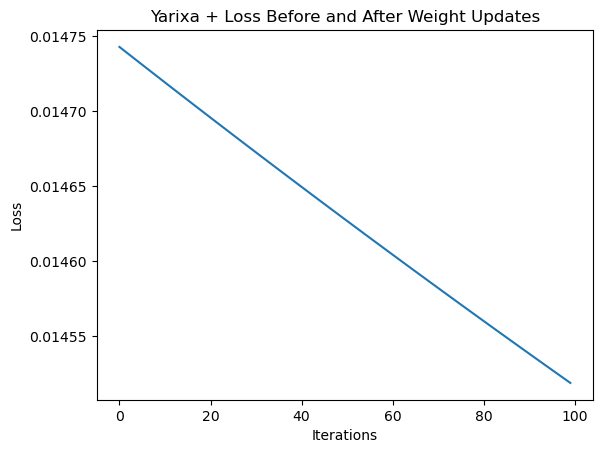

In [220]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(100):

    # Perform forward propagation to compute the network's predictions
    # Forward_propagation function with inputs network
    activations = forward_propagation(inputs, network)

    # Compute the loss (error) between the true labels and the predicted output
    # Compute loss for y_true and activations[-1]
    loss = compute_loss(y_true, activations[-1])
    losses.append(loss)

    # Perform backpropagation to compute gradients
    gradients = backpropagation(network, activations, y_true)

    # Update weights
    update_weights(network, gradients, learning_rate)
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Yarixa + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code